In [7]:
%matplotlib inline

# You might have to figure out what other import statements you need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn import tree
from IPython.display import Image
import seaborn as sns
# Figure out what to import the csv file 

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
#df.dropna() eksik verilein tamamnını silinmesi
##inplace=True bunu yapınca kalıcı siler
# df.fillna(df.mean()[:]) boş değerlerie ortalma değer atar

## tahmine dayalı değer atama yöntemleri

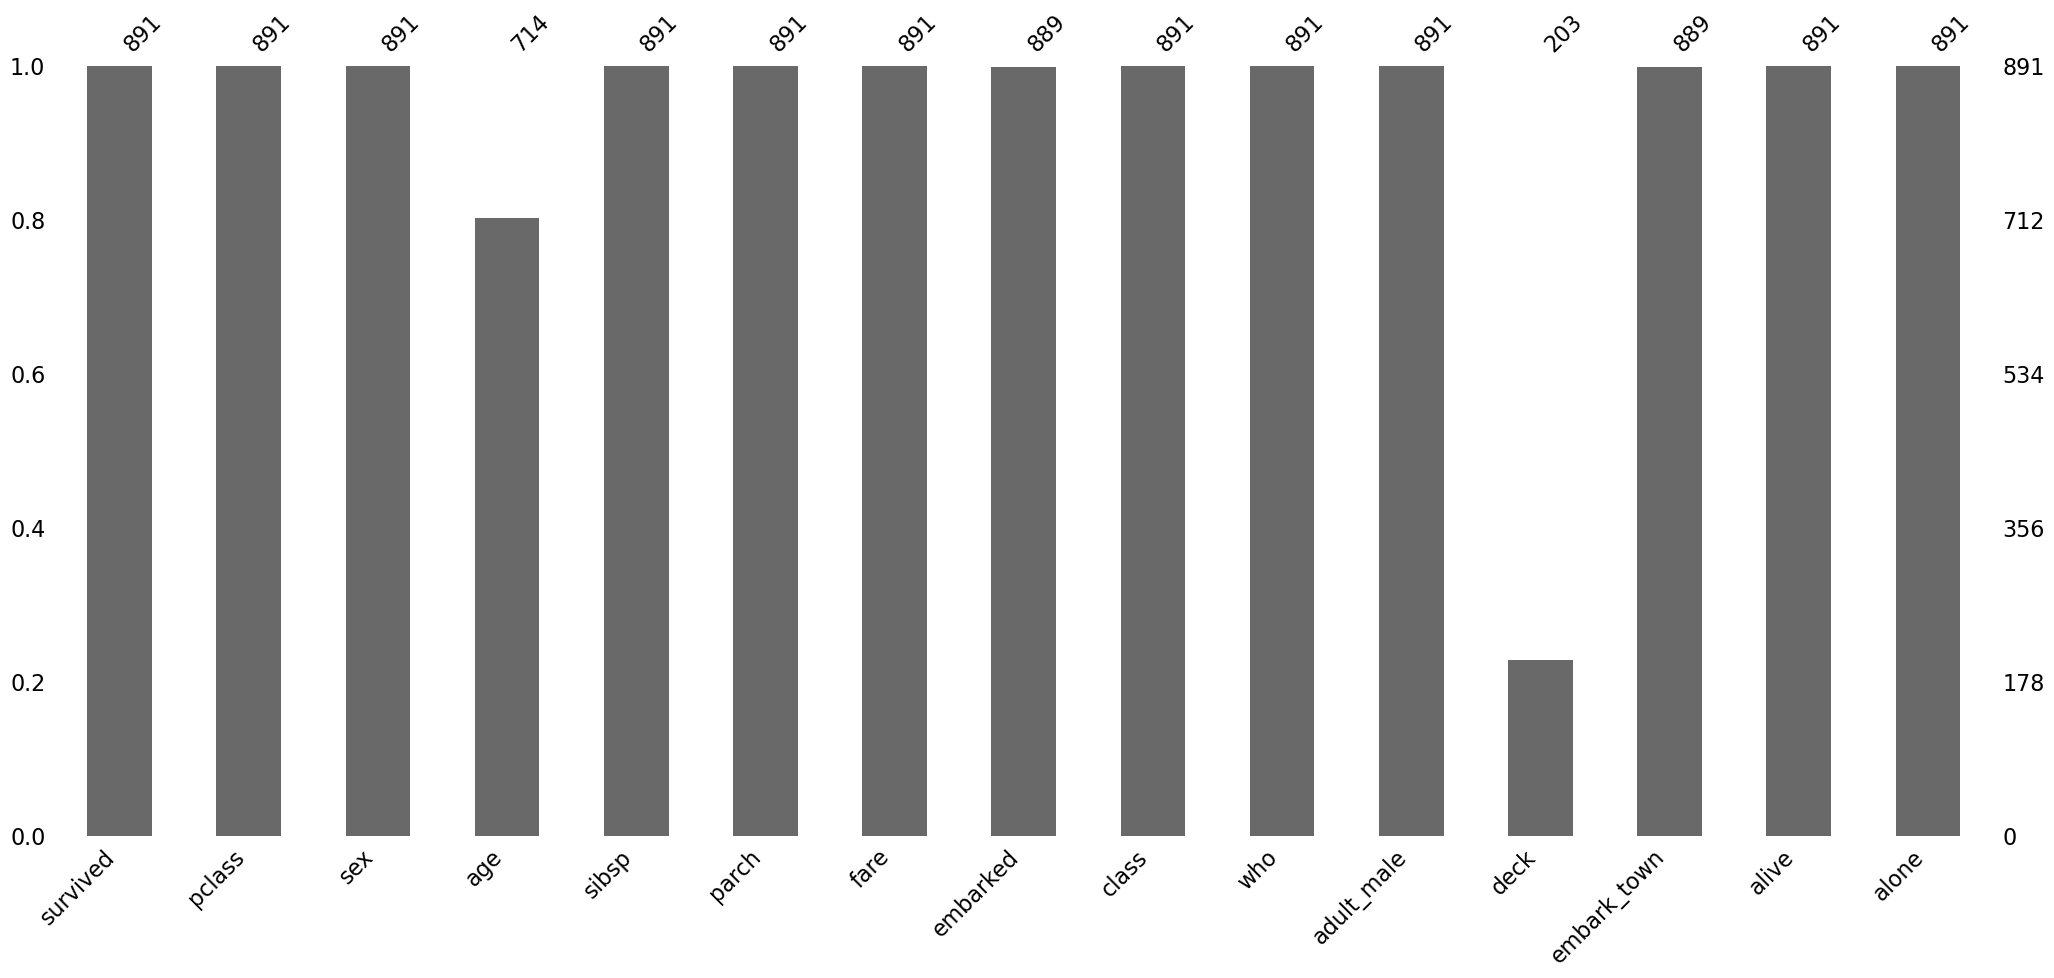

In [16]:
import missingno as msno
msno.bar(df);

In [18]:
#visulising categorrical features
def plot_cat_cols(df):
    cols = [col for col in df.columns if  col != 'Survived' and df[col].nunique() in range(8)]
    fig = plt.figure(figsize = (10, 8))
    for i,  col in enumerate(cols):
        col_grp = train.groupby(col, as_index = False)['Survived'].mean().sort_values(by = 'Survived', ascending = False)
        ax = fig.add_subplot(3,2,i+1)
        sns.barplot(col_grp, x = col, y = 'Survived', ax =ax)
        plt.tight_layout()
    plt.show()
    return fig
        
    
    
plot_cat_cols(train) 

NameError: name 'train' is not defined

In [20]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Rastgele yaş değerleri oluşturma
def generate_random_ages(num_ages, min_age=1, max_age=80):
    return np.random.randint(min_age, max_age + 1, size=num_ages)

# Eksik değerlerin sayısını bulma
num_missing = df['age'].isna().sum()

# Rastgele yaşlar oluşturma
random_ages = generate_random_ages(num_missing)

# Eksik değerlerin yer aldığı indeksler
missing_indices = df[df['age'].isna()].index

# Eksik yaş değerlerini doldurma
df.loc[missing_indices, 'age'] = random_ages

# Doldurulmuş veri setini inceleyin
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [24]:
# You will have to transform Sex into a non text form.
# I choose four features, you could have chosen others
feature_cols = ['pclass', 'parch', 'age', 'sex']

In [26]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
# Make sex into something you can feed into a model
df['sex']= lbe.fit_transform(df['sex']) # 1 man 0 women

In [28]:
df.head() 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [32]:
df.drop('deck', axis=1, inplace=True)

In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## train

In [37]:
X = df.loc[:, feature_cols]

y = df['survived']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 0)

## Fit a Classification Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf = DecisionTreeClassifier(max_depth = 4)

In [78]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [80]:
# Returns a NumPy Array
# Predict for One Observation (image)
clf.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [82]:
# class predictions (not predicted probabilities)
predictions = clf.predict(X_test)

In [84]:
# calculate classification accuracy
score = clf.score(X_test, y_test)

In [86]:
score

0.8026905829596412

In [88]:
y_test.value_counts()

survived
0    139
1     84
Name: count, dtype: int64

## Confusion matrix of Titanic predictions

In [91]:
cm = metrics.confusion_matrix(y_test, predictions)

(2.5, -0.5)

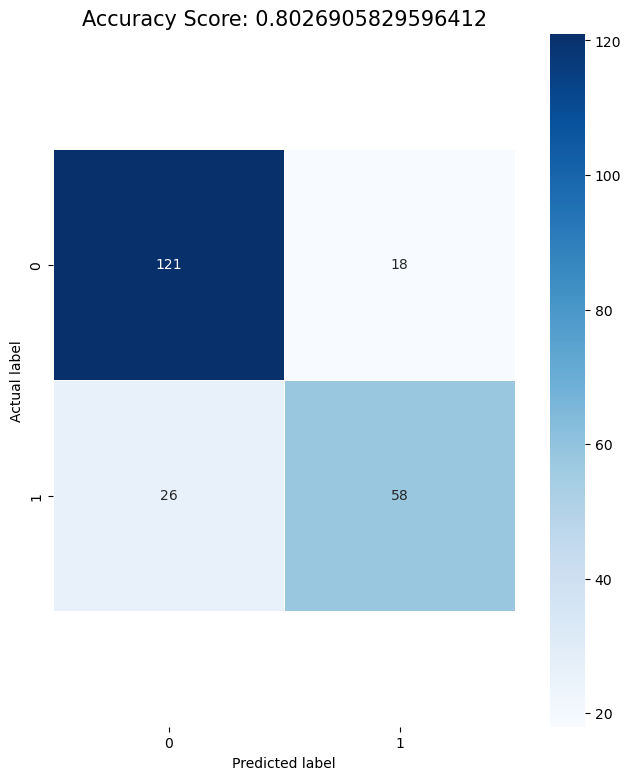

In [93]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score), size = 15);

# You can comment out the next 4 lines if you like
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

In [95]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
sex,0.621
pclass,0.213
age,0.127
parch,0.039


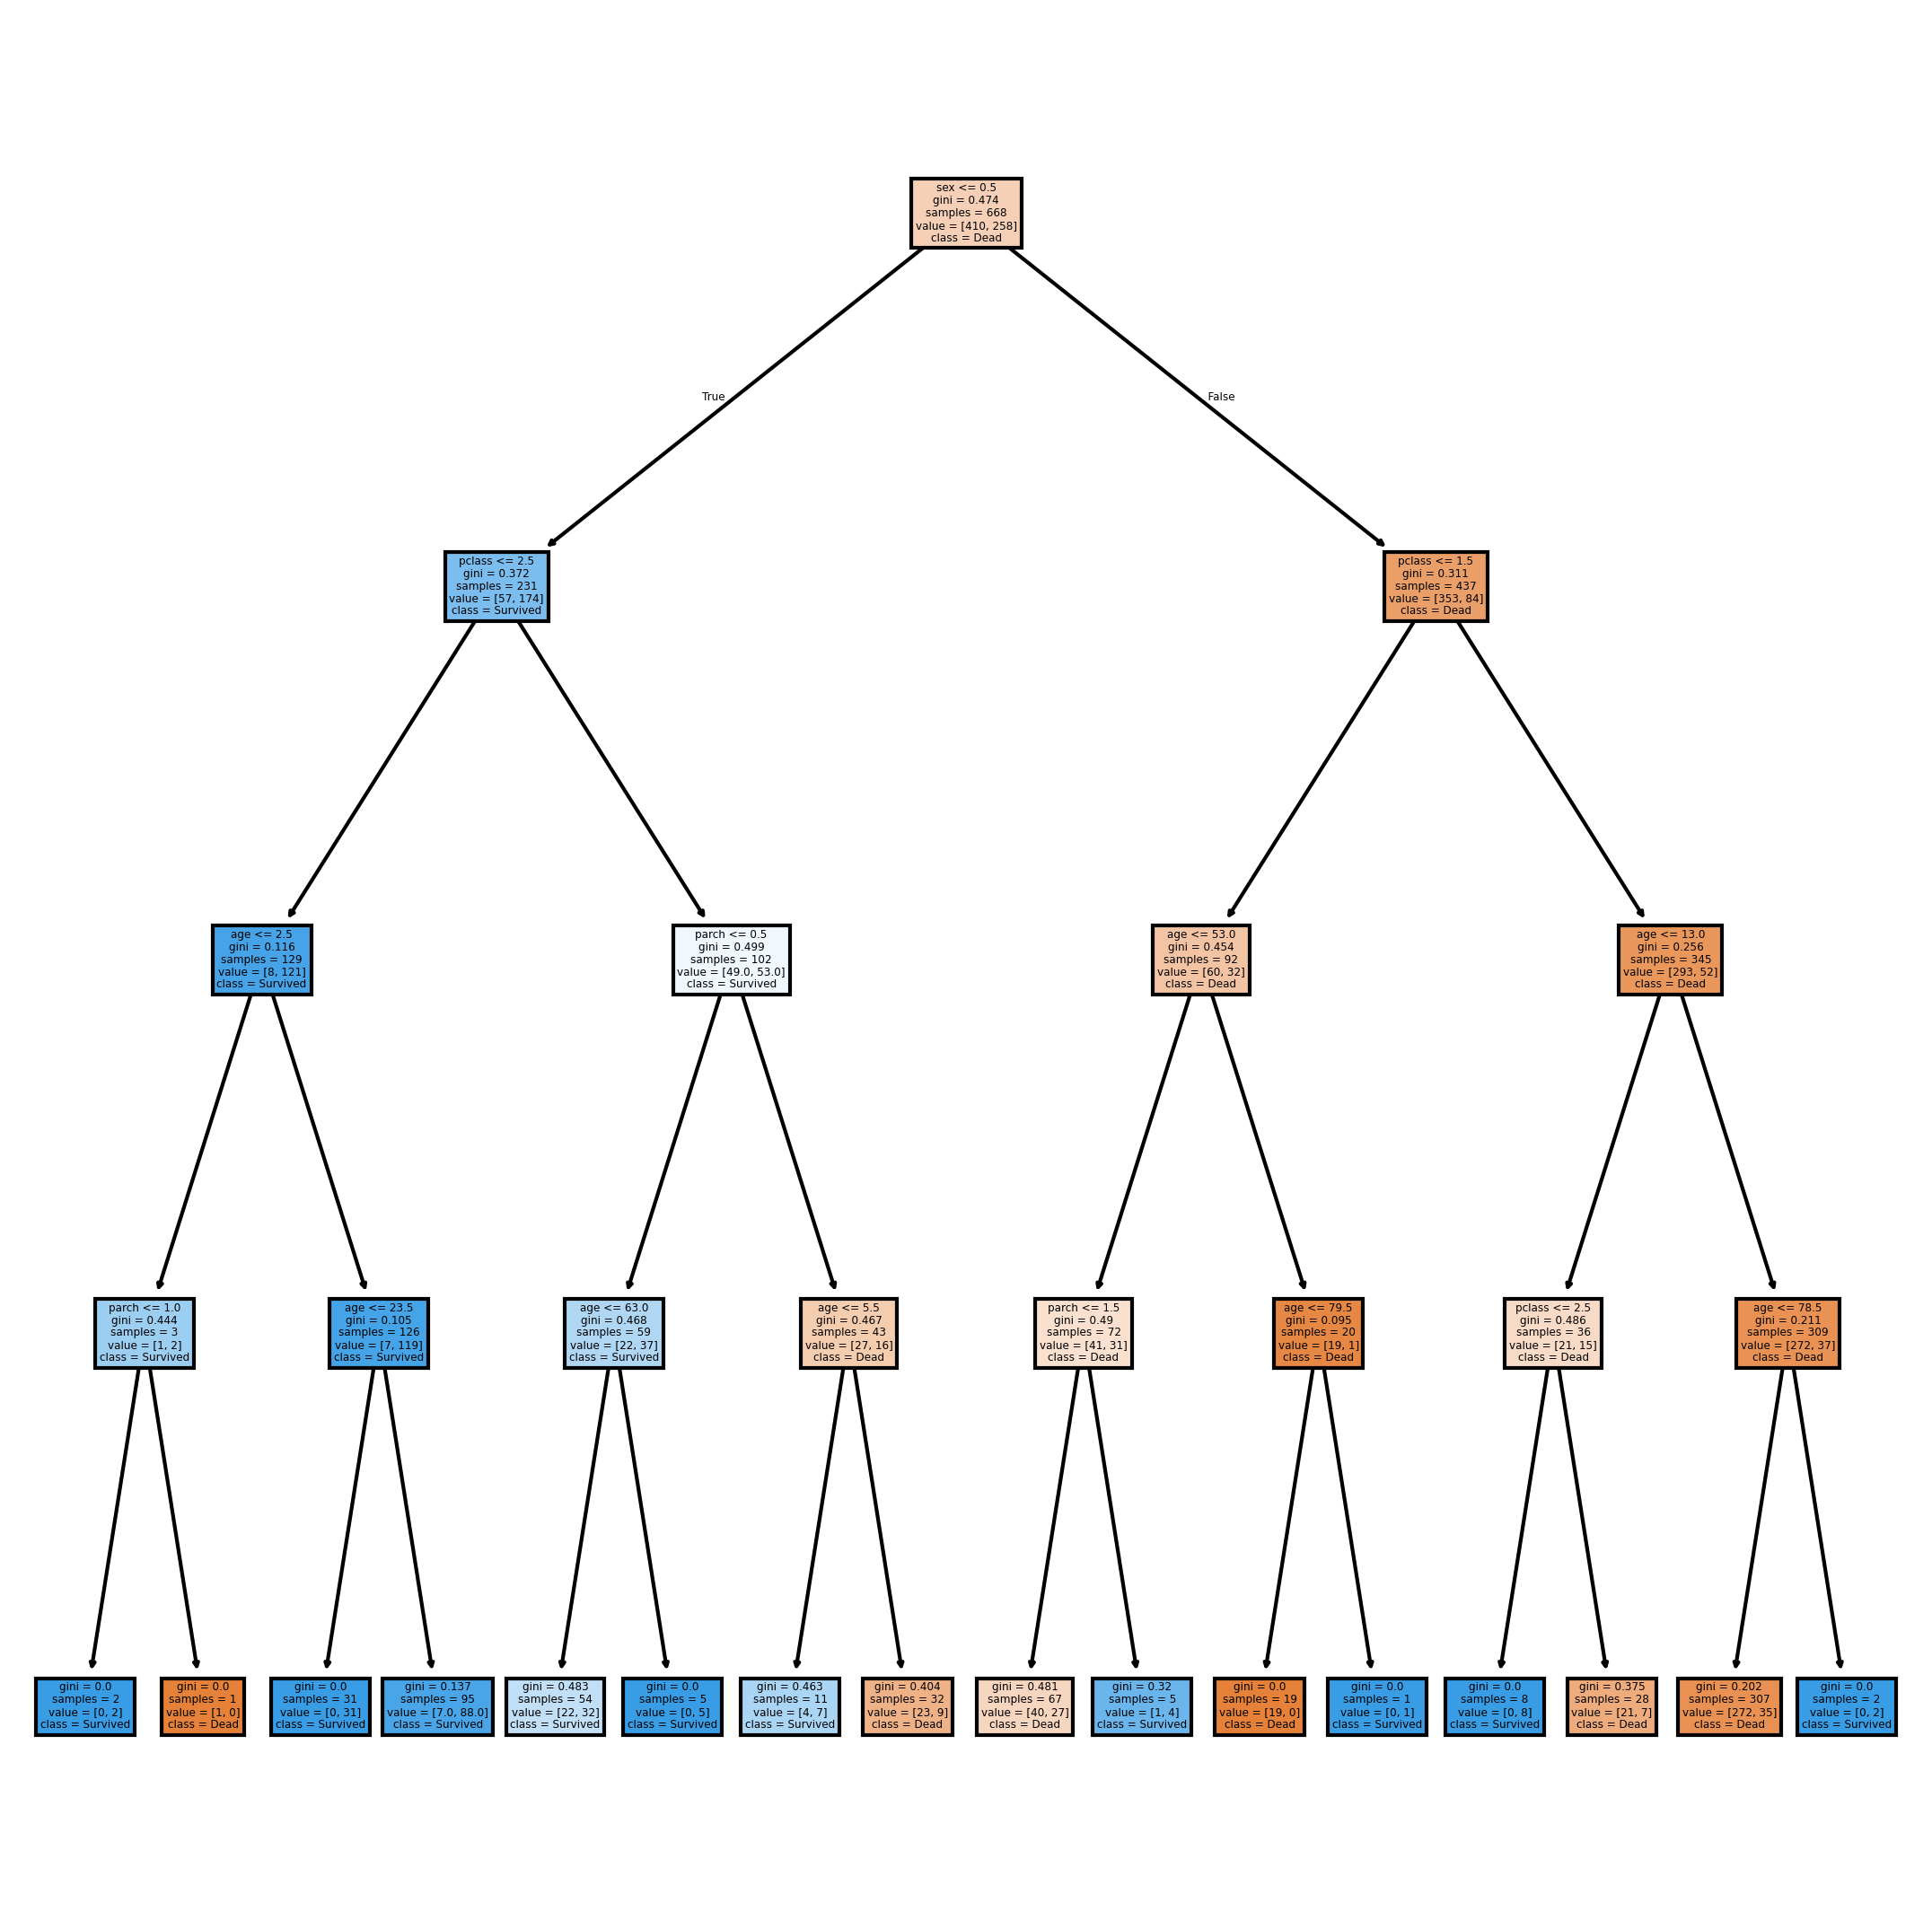

In [97]:
plt.figure(figsize=(9,9), dpi = 300)
tree.plot_tree(clf,
               feature_names = feature_cols, 
               class_names=['Dead', 'Survived'],
               filled = True);

In [57]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names=feature_cols,
                     class_names=['Dead', 'Survived'], 
                     rotate = True,
                     filled = True)


In [ ]:
import cv2
import os

input_dir = 'images/'

output_dir = 'output_images/'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)


for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        
        img = cv2.imread(os.path.join(input_dir, filename))
        
        resized_img = cv2.resize(img, (48, 48))
        
     
        cv2.imwrite(os.path.join(output_dir, filename), resized_img)

print("The resizing of the images is complete.")
